In [84]:
# Playing about with the spectra from the archive
# https://hesperia.gsfc.nasa.gov/rhessi3/mission-archive/index.html

# Note that these are:
# Standard Energy Resolution - 
# For every orbit of the RHESSI mission (midnight-to-midnight), count spectrum files 
# with 4s bins, 77 energy bins 3-250 keV, combining all functional detectors (front segment only). 
# For every flare, there are Spectral Response Matrix (SRM) files with the same energy bins 
# and the same combined detector segments as in those spectrum files.
# 
#  and also have
# High Energy Resolution - For the larger RHESSI flares (events seen above 50 keV), 
# count spectrum files for the orbit containing the flare (midnight-to-midnight) 
# for each separate detector (front segment only), with 4s time bins and energy bins 
# from 3 keV to 3 MeV, starting with 1/3 keV bins up to 15 keV and larger bins for 
# higher energies, but finer bins surrounding each line. A combined-detector (all functional front detectors) 
# file is also provided. The corresponding Spectral Response Matrix (SRM) files are also provided. (more info)
# 
# Here playing about with the hard microflares from 17-Nov-2006 about 05:13
# 
# 17-Dec-2024 IGH


In [85]:
from astropy.io import fits
import astropy.table as atab
import astropy.units as u
import astropy.time as atime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from sunpy.time import time

In [86]:
# From https://umbra.nascom.nasa.gov/rhessi/rhessi_extras/spectra/fits_standard/2006/11/17/hsi_spectrum_20061117_0419_0555_3_250keV_alld.fits
specfile='spectra/hsi_spectrum_20061117_0419_0555_3_250keV_alld.fits'
# specfile='spectra/hsi_spectrum_20030205_0134_0310_3_250keV_alld.fits'
# Last a0 flare in RHESSI?
# specfile='spectra/hsi_spectrum_20180303_0329_0503_3_250keV_alld.fits'
# From https://umbra.nascom.nasa.gov/rhessi/rhessi_extras/spectra/fits_standard/2006/11/17/hsi_srm_20061117_0512_0516_3_250keV_alld.fits
srmfile='spectra/hsi_srm_20061117_0512_0516_3_250keV_alld.fits'

In [87]:
# Load things in as just fits files but also using in sunkit-spex stuff for reference, i.e.
# https://github.com/sunpy/sunkit-spex/blob/main/sunkit_spex/extern/rhessi.py
spec = fits.open(specfile)


In [88]:
spec.info()

Filename: spectra/hsi_spectrum_20061117_0419_0555_3_250keV_alld.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   ()      
  1  RATE          1 BinTableHDU    105   1452R x 7C   [77E, 77E, 77J, 77E, I, D, E]   
  2  ENEBAND       1 BinTableHDU     48   77R x 3C   [J, E, E]   
  3  HESSI Spectral Object Parameters    1 BinTableHDU    411   1R x 182C   [I, I, I, I, I, B, B, 6A, B, 9B, D, D, 2E, 2E, I, B, I, E, I, 27B, 18B, I, I, I, I, I, I, I, I, E, I, I, 6E, I, E, I, I, I, 20A, 27B, 2E, D, I, 2D, I, I, B, B, B, I, E, I, E, E, E, E, 18D, 18E, 18E, 18E, 18E, 18I, 18I, E, I, 18I, 18J, E, I, E, E, E, E, I, 4A, B, 10B, I, 2D, 2D, J, 385A, I, 18B, B, B, B, 18B, 10B, B, E, E, I, 2E, E, I, D, 10B, 10B, E, B, B, B, 16A, 25A, 9A, 9A, I, I, 9E, E, I, E, I, 18B, 77E, 1452E, I, 6A, 4J, I, D, E, E, I, 26136E, 2E, J, D, 9I, 36E, 2D, B, 2D, 7J, D, B, 91E, 78E, 81E, 8A, I, 54B, 18B, J, J, J, J, J, J, E, E, E, E, D, D, B, B, I, I, I, 9E, 9E, D, D

In [89]:
for k in spec[0].header.keys():
    print(k,"   ",spec[0].header[k])

SIMPLE     True
BITPIX     8
NAXIS     0
EXTEND     True
DATE     2024-04-21T20:23:11
ORIGIN     RHESSI
OBSERVER     atolbert
TELESCOP     RHESSI
INSTRUME     RHESSI
OBJECT     Sun
DATE_OBS     2006-11-17T04:19:00.000
DATE_END     2006-11-17T05:55:48.000
TIME_UNI     1
ENERGY_L     0.0
ENERGY_H     0.0
TIMESYS     1979-01-01T00:00:00
TIMEUNIT     d
AUTHOR     SPECTRUM2FITS
RA     0.0
DEC     0.0
RA_NOM     0.0
DEC_NOM     0.0
EQUINOX     2000.0
RADECSYS     FK5
TIMVERSN     OGIP/93-003
VERSION     1.0


In [90]:
spec[1].header

XTENSION= 'BINTABLE'           /  Written by IDL:  Sun Apr 21 20:23:11 2024     
BITPIX  =                    8 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 1246 /   Number of bytes per row                      
NAXIS2  =                 1452 /   Number of rows                               
PCOUNT  =                    0 /  Random parameter count                        
GCOUNT  =                    1 /  Group count                                   
TFIELDS =                    7 /   Number of columns                            
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
DATE    = '2024-04-21T20:23:11' / File creation date (YYYY-MM-DDThh:mm:ss UTC)  
ORIGIN  = 'RHESSI  '        

In [91]:
spec[2].header

XTENSION= 'BINTABLE'           /  Written by IDL:  Sun Apr 21 20:23:11 2024     
BITPIX  =                    8 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                   12 /   Number of bytes per row                      
NAXIS2  =                   77 /  Number of rows                                
PCOUNT  =                    0 /  Random parameter count                        
GCOUNT  =                    1 /  Group count                                   
TFIELDS =                    3 /   Number of columns                            
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
DATE    = '2024-04-21T20:23:11' / File creation date (YYYY-MM-DDThh:mm:ss UTC)  
ORIGIN  = 'RHESSI  '        

In [92]:
spec[3].header

XTENSION= 'BINTABLE'           / Written by IDL:  Sun Apr 21 20:23:11 2024      
BITPIX  =                    8 /                                                
NAXIS   =                    2 / Binary table                                   
NAXIS1  =               118325 /  Number of bytes per row                       
NAXIS2  =                    1 / Number of rows                                 
PCOUNT  =                    0 / Random parameter count                         
GCOUNT  =                    1 / Group count                                    
TFIELDS =                  182 /  Number of columns                             
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
DATE    = '2024-04-21T20:23:11' /  File creation date (YYYY-MM-DDThh:mm:ss UTC) 
ORIGIN  = 'RHESSI  '        

In [93]:
spec[1].header["DETUSED"]

'SEGMENTS: 1F|2F|3F|4F|6F|7F|8F|9F'

In [94]:
rate_dat=spec["RATE"]

start_time = atime.Time(rate_dat.header["DATE_OBS"], format="isot", scale="utc")
bin_starts = atime.TimeDelta(rate_dat.data["TIME"], format="sec")
bin_starts -= bin_starts[0]
time_deltas = atime.TimeDelta(rate_dat.data["TIMEDEL"], format="sec")
time_dels=time_deltas.to_value(u.s)

spec_stimes = start_time + bin_starts
spec_etimes = spec_stimes + time_deltas
time_bins = np.column_stack((spec_stimes, spec_etimes))

cts_rates = rate_dat.data["RATE"]
cts_rate_err = rate_dat.data["STAT_ERR"]
livetimes=rate_dat.data["LIVETIME"]
counts = cts_rates * livetimes * time_dels[:, None]
counts_err = cts_rate_err * livetimes * time_dels[:, None]

channels = spec["ENEBAND"].data
channel_bins = np.column_stack((channels["E_MIN"], channels["E_MAX"]))

tims=[t.datetime for t in time_bins[:,0]]

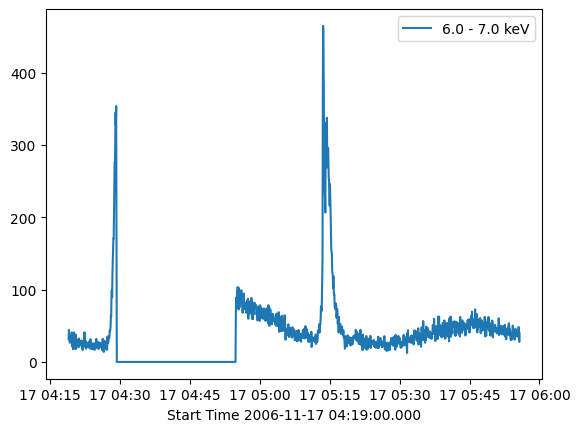

In [95]:
ii=3
plt.plot(tims,counts[:,ii],label=f'{channel_bins[ii,0]} - {channel_bins[ii,1]} keV')
plt.legend()
plt.xlabel('Start Time '+time_bins[0,0].iso)
plt.show()


In [96]:
att_dat=spec["HESSI Spectral Object Parameters"]

n_attenuator_changes = att_dat.data["SP_ATTEN_STATE$$TIME"].size
atten_change_times = atime.Time(att_dat.data["SP_ATTEN_STATE$$TIME"], format="utime").utc
atten_change_times = atten_change_times.reshape(n_attenuator_changes)

print(atten_change_times.isot)

['2006-11-17T04:19:00.000']


In [97]:
print(att_dat.data["DET_INDEX_MASK"])
print(att_dat.data["SEG_INDEX_MASK"])
print(att_dat.data["USE_SEGMENT"])
print(att_dat.data["SEP_DETS"])

[[0 0 0 0 0 0 0 0 0]]
[[1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0]]
[[1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0]]
[1]


In [98]:
# Wait for the ndcube version

# import pandas as pd

# # Create a DataFrame with time bins as index and energy bins as columns
# spectrogram_df = pd.DataFrame(data=counts, index=tims, columns=[f'{e_min}-{e_max} keV' for e_min, e_max in channel_bins])

In [99]:
# spectrogram_df.plot()
# plt.show()